# Unsupervised Learning | Clustering (DBSCAN)


### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## DBSCAN Clustering | Full Case-study (Wholesale Customers)


### Importing & Inspecting Data


In [3]:
df = pd.read_csv('data/wholesale-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# df['Channel'].unique()
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
# df['Region'].unique()
df['Region'].value_counts()


3    316
1     77
2     47
Name: Region, dtype: int64

### Exploring Data


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

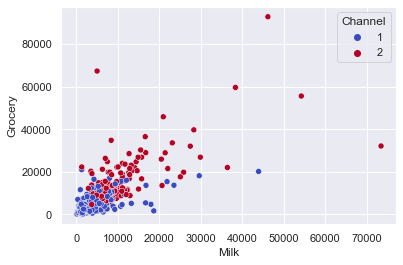

In [26]:
sns.scatterplot(x='Milk', y='Grocery', data=df,hue='Channel', palette='coolwarm')

In [22]:
df.drop(['Channel', 'Region'], axis=1).corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


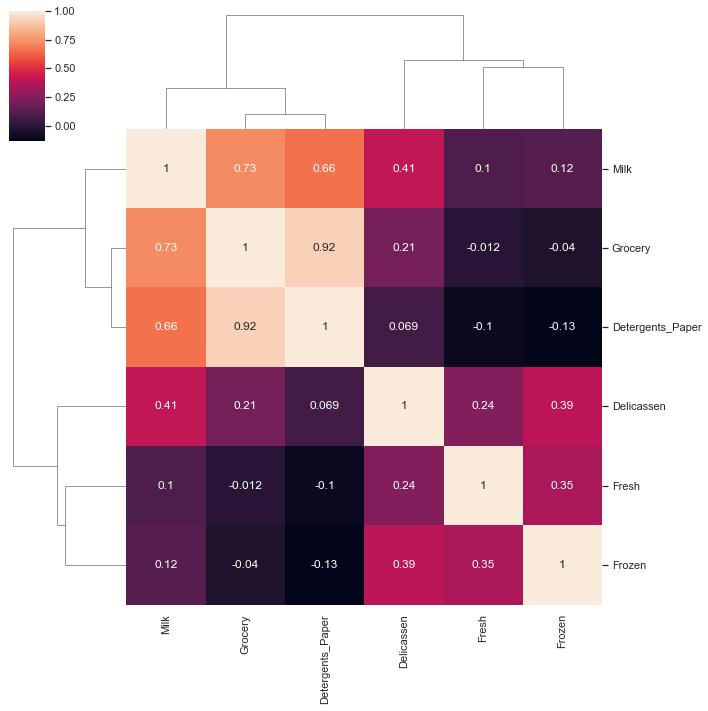

In [30]:
sns.clustermap(df.drop(['Channel', 'Region'], axis=1).corr(),annot=True)

### Preprocessing Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
scaled_X = sc.fit_transform(df)

In [36]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

### Model Building & Predicting


##### DBSCAN with Unknown Value of Epsilon


In [37]:
from sklearn.cluster import DBSCAN

In [38]:
model = DBSCAN(eps=2)

In [39]:
model.fit(scaled_X)

DBSCAN(eps=2)

In [40]:
model.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

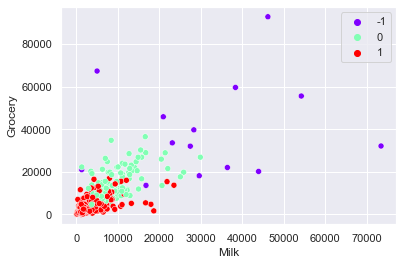

In [43]:
sns.scatterplot(x='Milk', y='Grocery', data=df,hue=model.labels_, palette='rainbow')


In [45]:
df['clusters'] = model.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [48]:
# df[df['clusters'] == -1]
len(df[df['clusters'] == -1])

17

##### DBSCAN with Unknown Value of Epsilon


In [49]:
noise_percent = []
for i in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN(eps=i)
    dbscan.fit(scaled_X)

    noise = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) 
    noise_percent.append(noise)

noise_percent

[100.0,
 100.0,
 100.0,
 98.86363636363636,
 91.36363636363636,
 82.5,
 77.04545454545455,
 70.0,
 62.27272727272727,
 52.04545454545455,
 42.27272727272727,
 34.31818181818182,
 30.90909090909091,
 27.5,
 23.863636363636363,
 22.954545454545453,
 20.227272727272727,
 18.181818181818183,
 16.136363636363637,
 14.772727272727273,
 13.181818181818182,
 12.727272727272727,
 11.590909090909092,
 10.909090909090908,
 10.681818181818182,
 9.545454545454545,
 8.863636363636363,
 7.7272727272727275,
 6.590909090909091,
 5.681818181818182,
 5.454545454545454,
 5.454545454545454,
 4.090909090909091,
 3.8636363636363638,
 3.6363636363636362,
 3.6363636363636362,
 3.409090909090909,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727]

<AxesSubplot:>

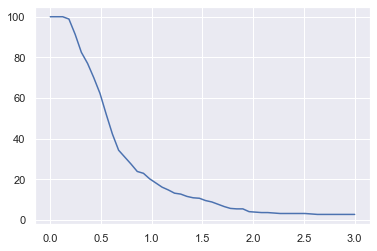

In [50]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=noise_percent)